# **Setting & Introduction**

In [ ]:
# Local PC로 실습하는 경우 실행 x / 단 작업경로를 "LGES_240704"로 맞춰주기
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/LGES_240704

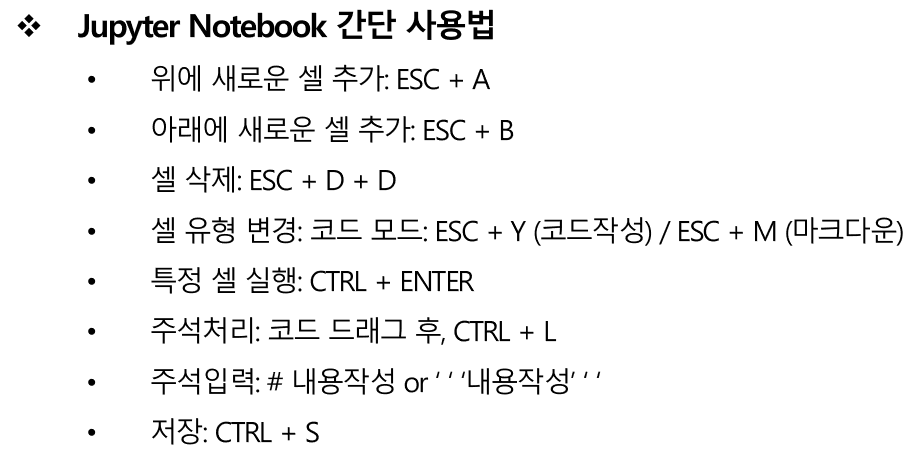

In [1]:
""" 설명 장표 불러오기 """
from IPython.display import Image
Image('image/1-Introduction2.PNG')

## **[Data Balancing & XAI 실습 목차]**
 - ***(1) Data Balancing (1) - UnderSampling √***

 - (2) Data Balancing (2) - Oversampling

 - (3) XAI

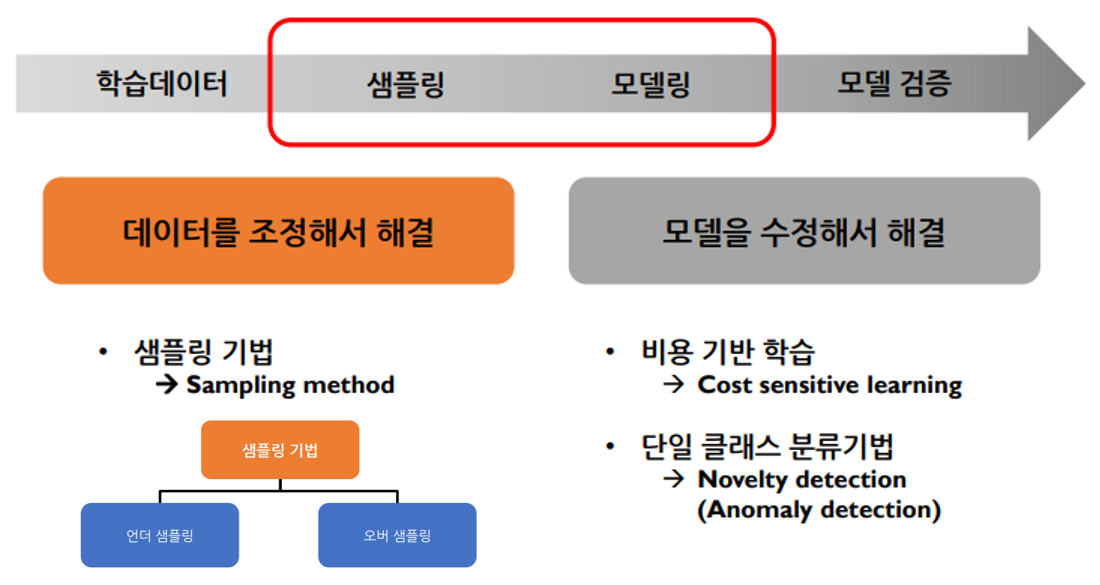

In [2]:
""" 설명 장표 불러오기 """
Image('image/3-DataBalancing1.PNG')

## **[Data Balancing - UnderSampling 목차]**
 #### **(1) Binary Class Problem**

  - Random UnderSampling

  - Tomek Links

  - Condensed Nearest Neighbor Rule (CNN Rule)

  - One-Side Selection (OSS)

 #### **(2) Multi Class Problem**

  - Random UnderSampling

  - Tomek Links

  - Condensed Nearest Neighbor Rule (CNN Rule)

  - One-Side Selection (OSS)



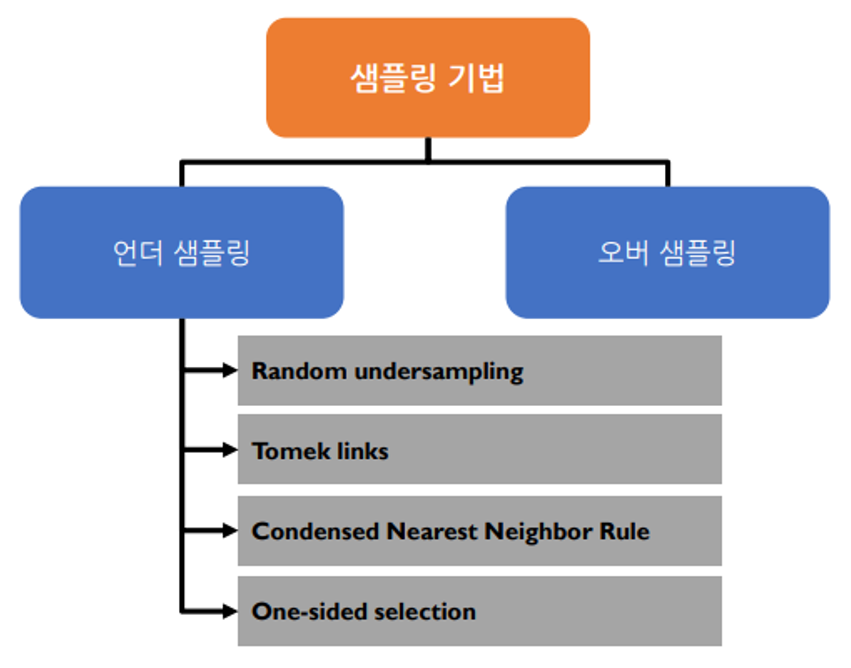

In [3]:
""" 설명 장표 불러오기 """
Image('image/4-UnderSampling1.PNG')

## **0. 모델링 환경 설정**

#### **0-1. 필요 패키지 불러오기**

imblearn document : https://imbalanced-learn.org/stable/introduction.html

In [4]:
""" 필요 패키지 설치 """
!pip install imblearn

In [4]:
""" 실습에 필요한 패키지 불러오기 """


""" 기본 연산과 관련된 패키지 """
import itertools
import numpy as np
import pandas as pd


""" 모델링 및 성능 산출과 관련된 패키지"""
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


""" 데이터 시각화 패키지 """
import seaborn as sns
import matplotlib.pyplot as plt


""" 경고 숨기기 """
import warnings
warnings.filterwarnings('ignore')

#### **0-2. 필요 함수 사전 정의**

In [5]:
""" (1) Sampling 전 후 데이터 분포를 시각화하여 분석하는 함수 (for Binary Classification) """

def plot_binary_representation(X, y, X_syn, y_syn, title1, title2):
    
    fig = plt.figure(figsize=(16, 8))

    ### 정상 데이터, 이상 데이터 추출
    y_normal, y_anomaly = y[y==0].dropna(), y[y==1].dropna()
    X_normal, X_anomaly = X.loc[list(y_normal.index), :], X.loc[list(y_anomaly.index), :]
    
    ### 기존 데이터 시각화
    ax1 = fig.add_subplot(1, 2, 1) ### 그림 그릴 위치 지정

    ax1.scatter(X_normal['X1'], X_normal['X2'], alpha=0.3, c='blue', label='Normal') ### Class1 시각화
    ax1.scatter(X_anomaly['X1'], X_anomaly['X2'], alpha=0.3, c='red', label='Anomaly') ### Class2 시각화
    
    ax1.spines['top'].set_visible(False) ### 그림의 위쪽 테두리 지우기
    ax1.spines['right'].set_visible(False) 
    plt.xlim((-5, 5)) ### x축 범위 지정
    plt.ylim((-5, 5))
    plt.legend()
    plt.tight_layout()
    plt.title(title1, fontsize=20)

    ### Sampling 된 데이터 시각화
    ax2 = fig.add_subplot(1, 2, 2)
    y_syn_normal, y_syn_anomaly = y_syn[y_syn==0].dropna(), y_syn[y_syn==1].dropna()
    X_syn_normal, X_syn_anomaly = X_syn.loc[list(y_syn_normal.index), :], X_syn.loc[list(y_syn_anomaly.index), :]

    ax2.scatter(X_syn_normal['X1'], X_syn_normal['X2'], alpha=0.3, c='blue', label='Normal')
    ax2.scatter(X_syn_anomaly['X1'], X_syn_anomaly['X2'], alpha=0.3, c='red', label='Anomaly')

    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.get_xaxis().tick_bottom()
    ax2.get_yaxis().tick_left()

    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.legend()
    plt.tight_layout()
    plt.title(title2, fontsize=20)
        
    plt.show()

In [6]:
""" (2) Sampling 전 후 데이터 분포를 시각화하여 분석하는 함수(for Multi-Class Classification) """

def plot_multiclass_representation(X, y, X_syn, y_syn, title1, title2):
    
    fig = plt.figure(figsize=(16, 8))

    ### 정상 데이터, 이상 데이터 추출
    y_normal, y_anomaly1, y_anomaly2 = y[y==0].dropna(), y[y==1].dropna(), y[y==2].dropna()
    X_normal, X_anomaly1 = X.loc[list(y_normal.index), :], X.loc[list(y_anomaly1.index), :]
    X_anomaly2 = X.loc[list(y_anomaly2.index), :]
    
    ### 기존 데이터 시각화
    ax1 = fig.add_subplot(1, 2, 1) ### 그림 그릴 위치 지정

    ax1.scatter(X_normal['X1'], X_normal['X2'], alpha=0.3, c='blue', label='Normal') ### Class1 시각화
    ax1.scatter(X_anomaly1['X1'], X_anomaly1['X2'], alpha=0.3, c='red', label='Abnormal1') ### Class2 시각화
    ax1.scatter(X_anomaly2['X1'], X_anomaly2['X2'], alpha=0.3, c='green', label='Abnormal2') ### Class3 시각화
    
    ax1.spines['top'].set_visible(False) ### 그림의 위쪽 테두리 지우기
    ax1.spines['right'].set_visible(False) 
    plt.xlim((-5, 5)) ### x축 범위 지정
    plt.ylim((-5, 5))
    plt.legend()
    plt.tight_layout()
    plt.title(title1, fontsize=20)

    ### Sampling 된 데이터 시각화
    ax2 = fig.add_subplot(1, 2, 2)
    y_syn_normal, y_syn_anomaly1, y_syn_anomaly2 = y_syn[y_syn==0].dropna(), y_syn[y_syn==1].dropna(), y_syn[y_syn==2].dropna()
    X_syn_normal, X_syn_anomaly1 = X_syn.loc[list(y_syn_normal.index), :], X_syn.loc[list(y_syn_anomaly1.index), :]
    X_syn_anomaly2 = X_syn.loc[list(y_syn_anomaly2.index), :]

    ax2.scatter(X_syn_normal['X1'], X_syn_normal['X2'], alpha=0.3, c='blue', label='Normal')
    ax2.scatter(X_syn_anomaly1['X1'], X_syn_anomaly1['X2'], alpha=0.3, c='red', label='Abnormal1')
    ax2.scatter(X_syn_anomaly2['X1'], X_syn_anomaly2['X2'], alpha=0.3, c='green', label='Abnormal2') 

    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.get_xaxis().tick_bottom()
    ax2.get_yaxis().tick_left()

    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.legend()
    plt.tight_layout()
    plt.title(title2, fontsize=20)
        
    plt.show()

In [7]:
""" (3) Confusion Matrix를 시각화하는 함수 """

def plot_confusion_matrix(confusion_matrix, classes, name='Baseline'):

    ### Confusion Matrix 시각화
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.colorbar()

    ### X축 및 Y축 눈금에 Class 표시
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    ### Confusion Matrix 숫자 기입
    thresh = confusion_matrix.max() / 2. ### 폰트 색상 지정을 위한 Threshold
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'), ### 숫자 작성
                 horizontalalignment="center", ### 숫자를 각 행렬 가운데 작성
                 color="white" if confusion_matrix[i, j] > thresh else "black") ### Threshold에 따라 글자 색상 다르게 지정

    ### X축 및 Y축 레이블 표기
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    ### 이미지 크기 최적화 및 시각화
    plt.tight_layout()
    plt.show()

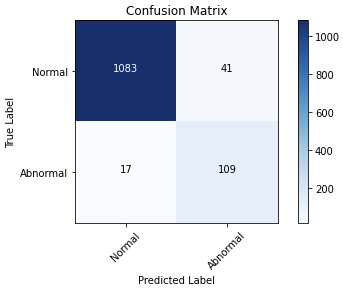

In [8]:
""" 설명 장표 불러오기 """
Image('image/2-Function1.PNG')

In [9]:
""" (4) 성능 평가 Metric을 산출하는 함수 """

"""
macro: Class 불균형을 고려한 성능지표
"""

def calculate_classification_metrics(true_labels, predicted_labels):
    
    ### 성능지표 산출
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='macro')
    recall = recall_score(true_labels, predicted_labels, average='macro')
    f1 = f1_score(true_labels, predicted_labels, average='macro')

    ### Log
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall : {recall:.4f}")
    print(f"F1-score : {f1:.4f}")
    
    return accuracy, precision, recall, f1

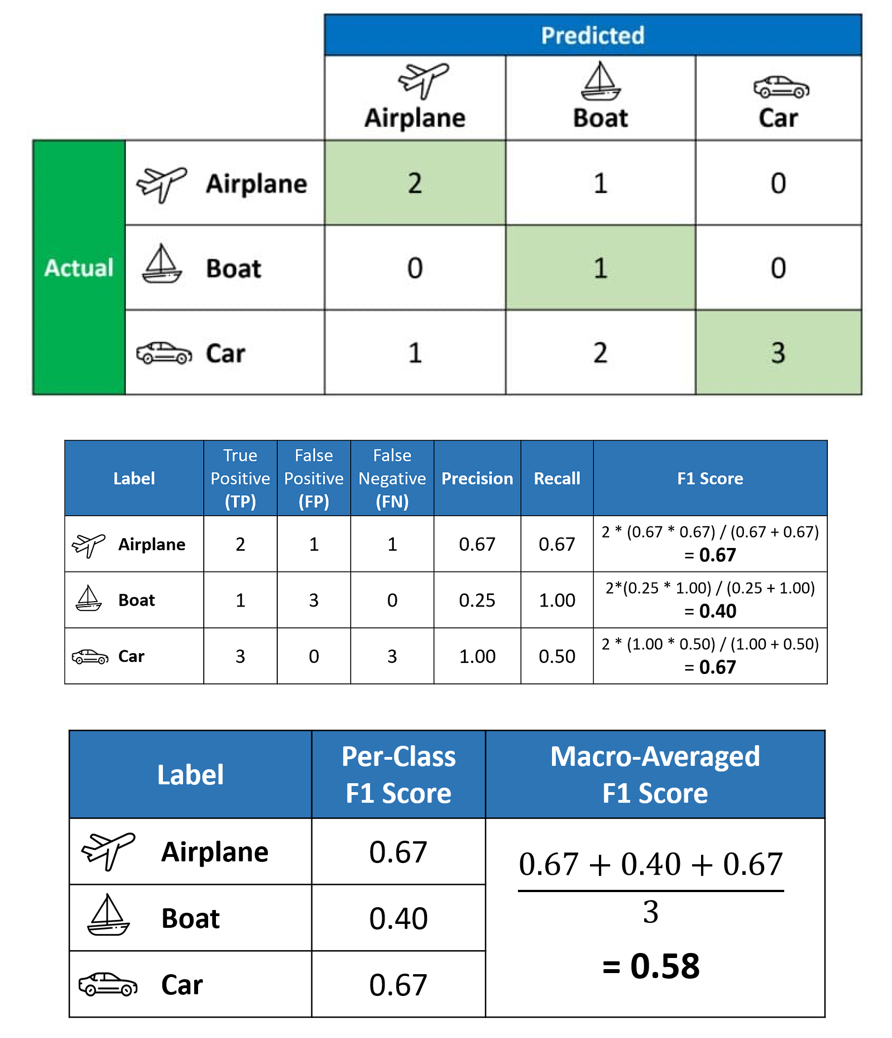

In [10]:
""" 설명 장표 불러오기 """
Image('image/2-Function2.PNG')

In [11]:
""" (5) 실습 데이터셋을 생성하는 함수 """
def create_dataset(n_samples=2000, n_classes=2, weights=(0.8, 0.2), n_cluster=1, class_sep=1, random_state=2024):
    
    ### 데이터셋 생성
    df = make_classification(n_samples=n_samples, ### Instance 개수
                                n_features=2, ### 변수 개수
                                n_redundant=0, ### 선형결합으로 생성 가능한 겹치는 변수 개수
                                n_classes=n_classes, ### Class 개수
                                weights=list(weights), ### 클래스 비율
                                n_clusters_per_class=n_cluster, ### Class 당 군집 개수
                                class_sep=class_sep, ### 클래스 군집 간 간격 (클수록 멀어짐)
                                random_state=random_state)
    
    ### X, y 구분
    X = pd.DataFrame(df[0], columns=['X1', 'X2'])
    y = pd.DataFrame(df[1], columns=['y'])
    return X, y

## **1. Binary Classification**

#### **1-1. 실습 데이터 생성**
 - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [12]:
""" 데이터 생성 """
X_syn, y_syn = create_dataset(n_samples=5000,
                               n_classes=2, 
                               weights=(0.9, 0.1), 
                               n_cluster=1, 
                               class_sep=1, 
                               random_state=2024)

print(X_syn.shape, y_syn.shape)

(5000, 2) (5000, 1)


In [13]:
""" 데이터 형태 확인 """
pd.concat((X_syn, y_syn),axis=1)

,X1,X2,y
0,-0.243538,0.685012,0
1,0.038535,0.480602,0
2,-0.405412,0.848257,0
3,-0.300821,0.347394,0
4,-0.908697,1.091915,0
...,...,...,...
4995,1.492623,1.454563,1
4996,-1.588241,0.866925,0
4997,-0.927179,1.232219,0
4998,0.169604,0.842192,0


In [14]:
""" 데이터 불균형 확인 """
print(y_syn.value_counts())

y
0    4487
1     513
Name: count, dtype: int64


In [15]:
""" Train/Test 분할 """
X_train, X_test, y_train, y_test = train_test_split(X_syn, y_syn, random_state=2024)

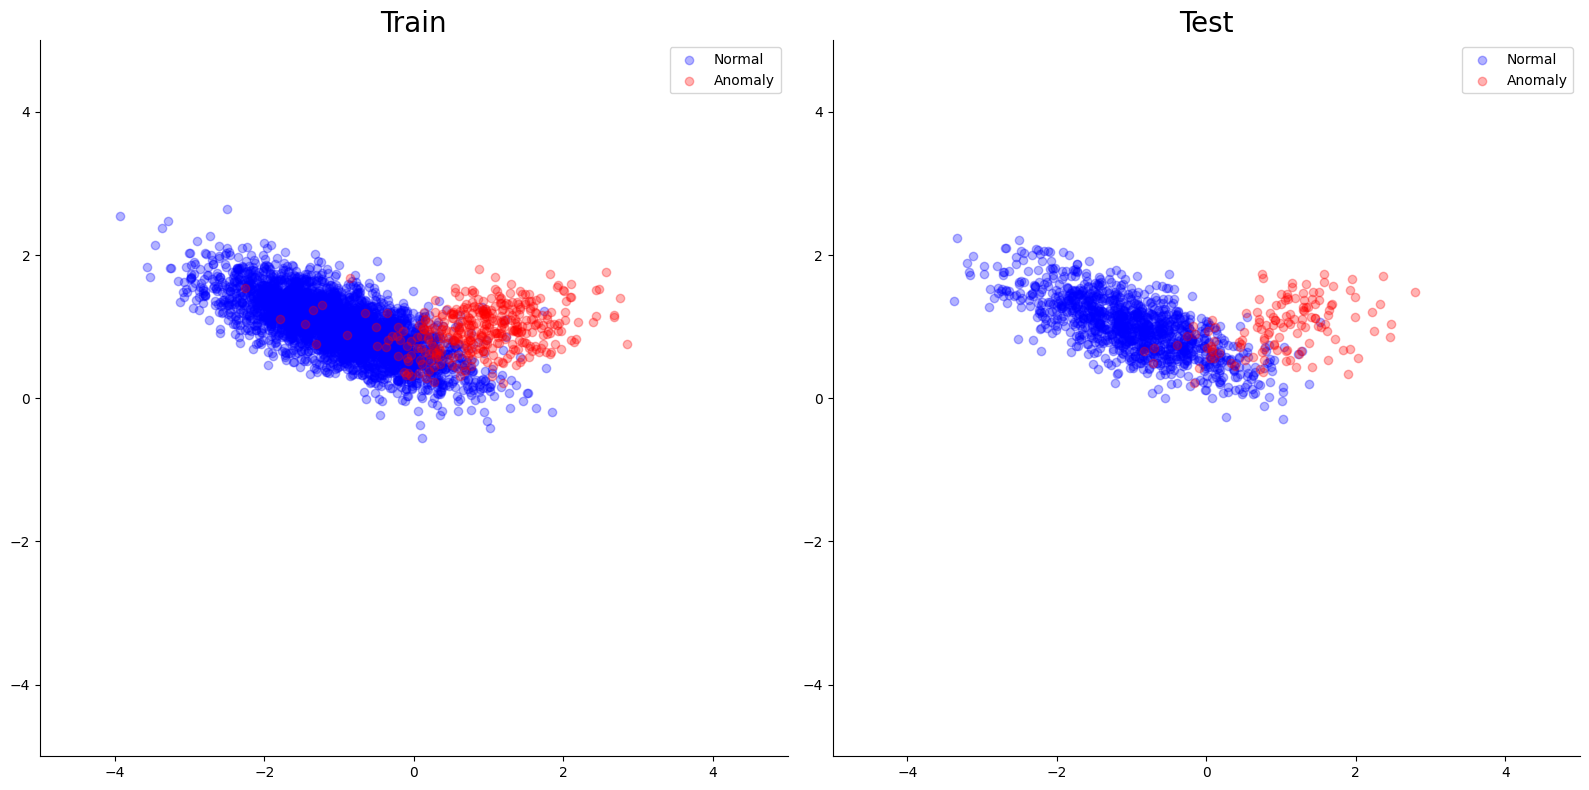

In [16]:
""" 데이터 분포 시각화 """
plot_binary_representation(X_train, 
                        y_train, 
                        X_test, 
                        y_test, 
                        title1='Train', 
                        title2='Test')

#### **1-2. 데이터가 불균형한 상태에서 모델링 (Baseline)**

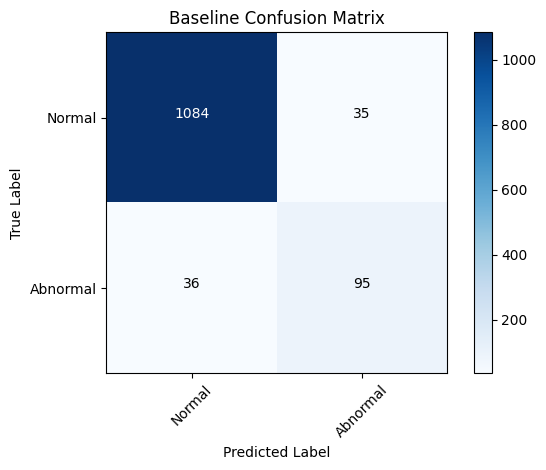

Accuracy : 0.9432
Precision : 0.8493
Recall : 0.8470
F1-score : 0.8481


In [17]:
""" 데이터 불균형한 상태에서 모델링 후, 모델 성능 파악 """

### 모델 Train & Test
dt_tree = tree.DecisionTreeClassifier(random_state=2024)
dt_tree.fit(X_train, y_train)
y_pred_test = dt_tree.predict(X_test)

### Confusion Matrix 시각화 및 성능 산출
classes = ['Normal', 'Abnormal']
cm_baseline = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm_baseline, classes)
acc_baseline, precision_baseline, recall_baseline, f1_baseline = calculate_classification_metrics(y_test, y_pred_test)

#### **1-3. Random UnderSampling 적용**
https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler

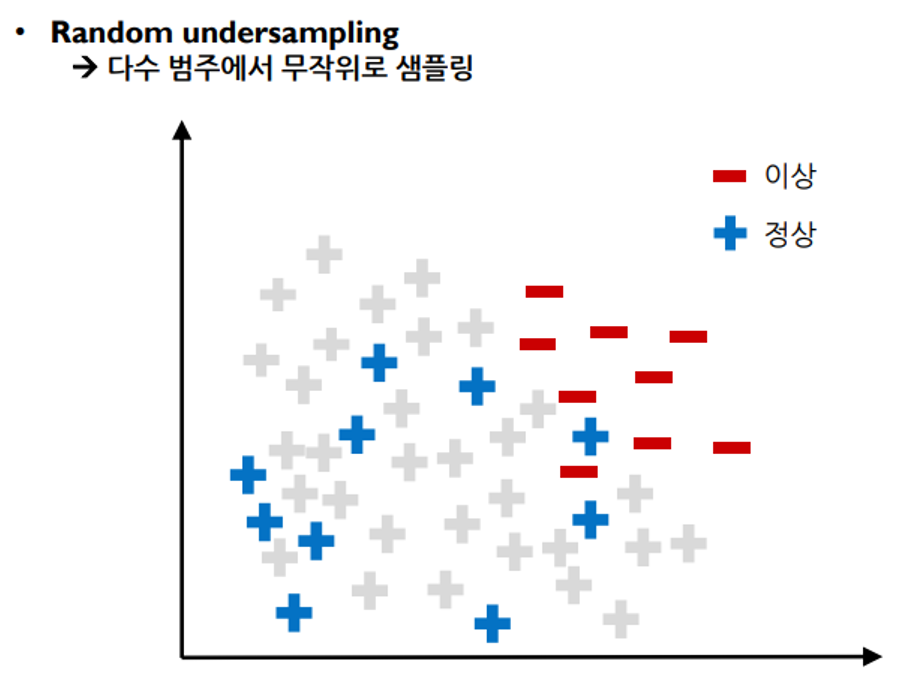

In [18]:
""" 설명 장표 불러오기 """
Image('image/4-UnderSampling2.PNG')

In [19]:
from imblearn.under_sampling import RandomUnderSampler

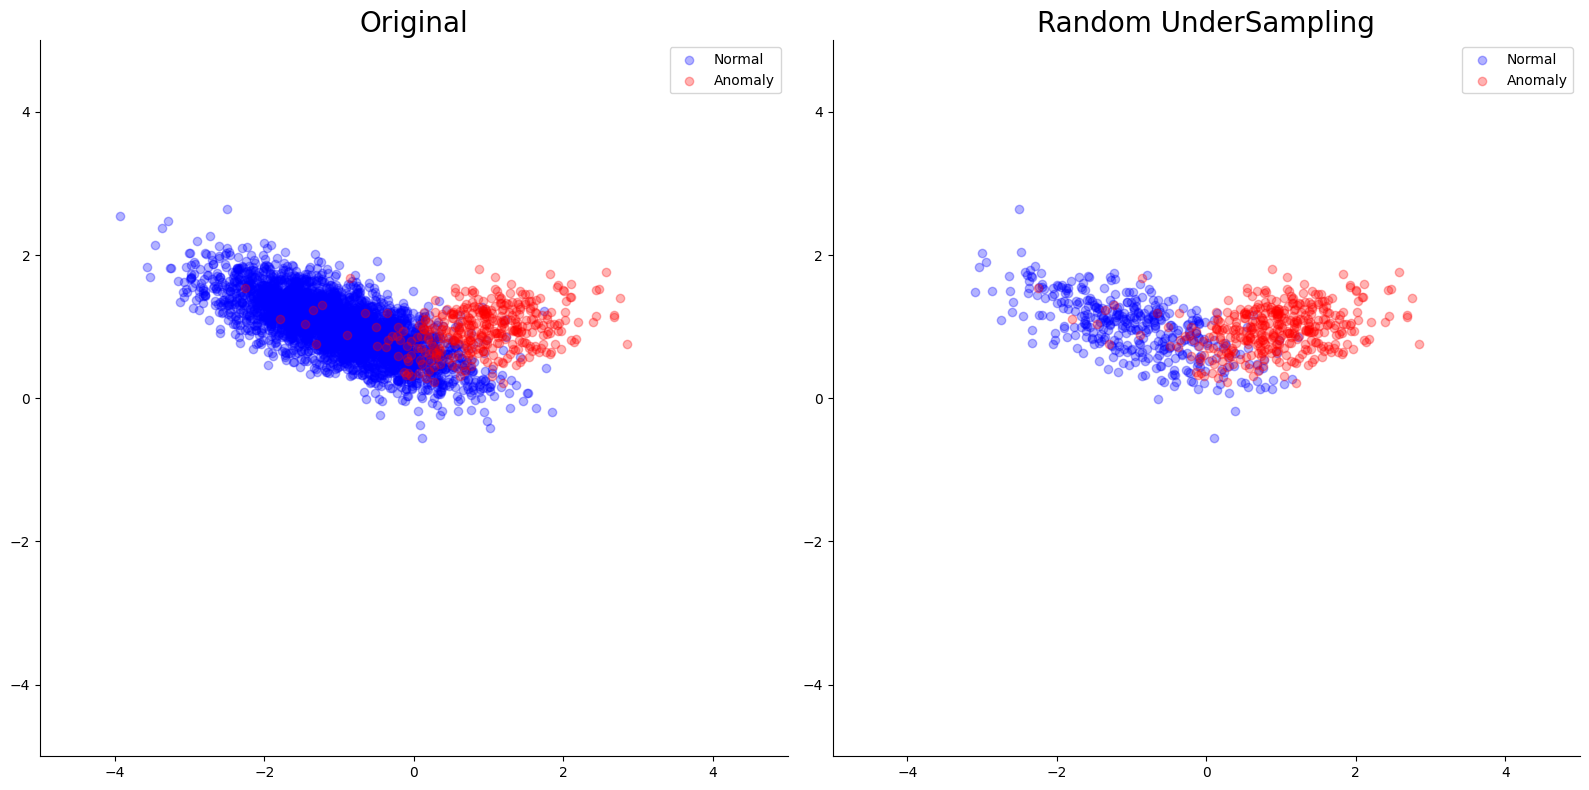

In [20]:
""" Random UnderSampling 적용 """

### Random UnderSampling 수행
rus = RandomUnderSampler(sampling_strategy='auto',
                         random_state=2024,
                         replacement=False)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

### 데이터 분포 시각화
plot_binary_representation(X_train, 
                        y_train, 
                        X_resampled, 
                        y_resampled, 
                        title1='Original', 
                        title2='Random UnderSampling')

In [21]:
""" Random UnderSampling 결과 확인 """
print('======== Before ========')
print(y_train.value_counts().sort_index())
print()
print('======== After ========')
print(y_resampled.value_counts().sort_index())

======== Before ========
y
0    3368
1     382
Name: count, dtype: int64

======== After ========
y
0    382
1    382
Name: count, dtype: int64


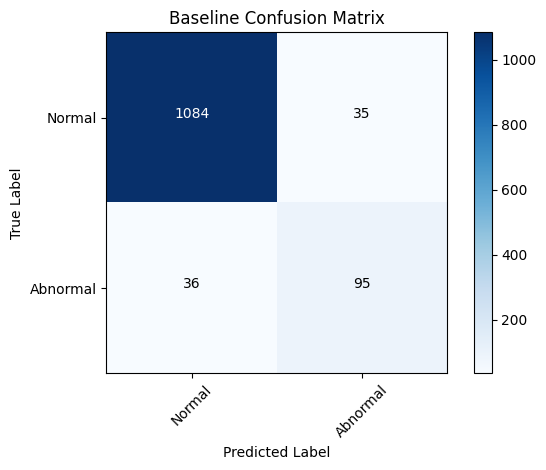

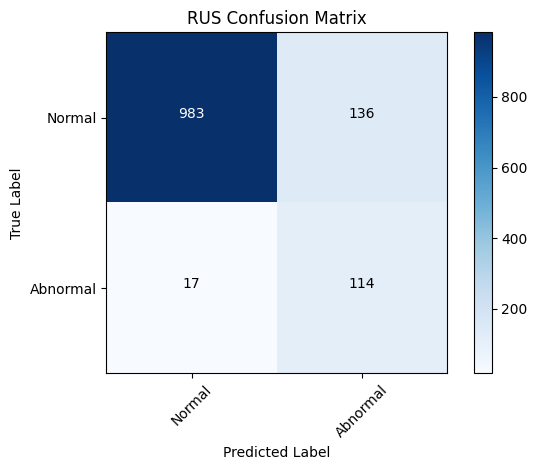

Baseline Accuracy : 0.9432
Baseline Precision : 0.8493
Baseline Recall : 0.847
Baseline F1-score : 0.8481
--------------------------
Accuracy : 0.8776
Precision : 0.7195
Recall : 0.8743
F1-score : 0.7631


In [22]:
""" Random UnderSampling 적용 후, 모델 성능 파악 """

### 모델 Train & Test
rus_tree = tree.DecisionTreeClassifier(random_state=2024)
rus_tree = rus_tree.fit(X_resampled, y_resampled)
y_pred_test = rus_tree.predict(X_test)

### Confusion Matrix 시각화 및 성능 산출
classes = ['Normal', 'Abnormal']
cm_rus = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm_baseline, classes)
plot_confusion_matrix(cm_rus, classes, 'RUS')
print(f'Baseline Accuracy : {round(acc_baseline,4)}')
print(f'Baseline Precision : {round(precision_baseline,4)}')
print(f'Baseline Recall : {round(recall_baseline,4)}')
print(f'Baseline F1-score : {round(f1_baseline,4)}')
print('--------------------------')
_, _, _, f1_rus = calculate_classification_metrics(y_test, y_pred_test)


#### **1-4. Tomek Links 적용**

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html#imblearn.under_sampling.TomekLinks

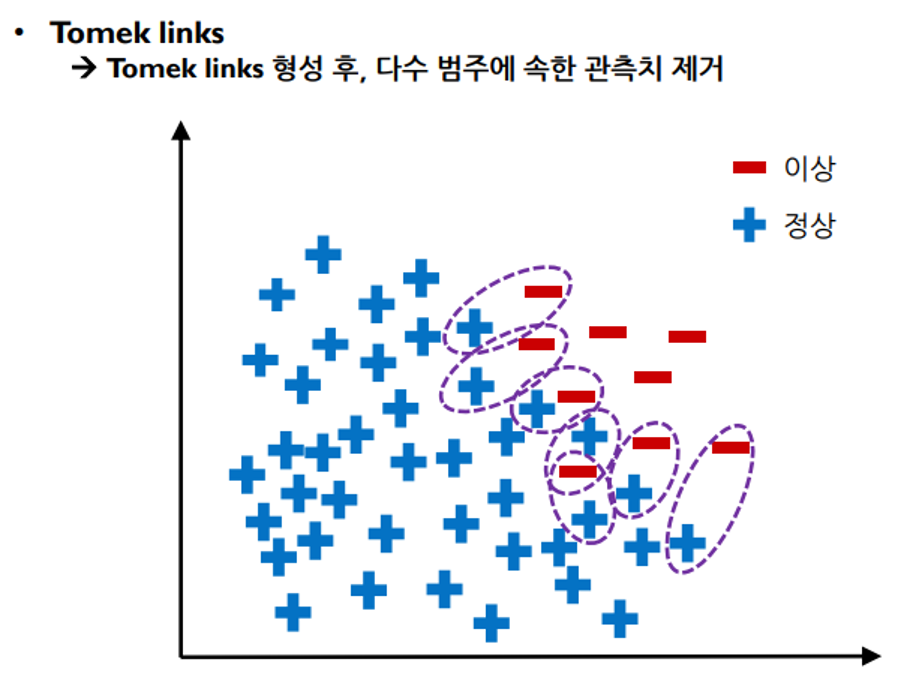

In [23]:
""" 설명 장표 불러오기 """
Image('image/4-UnderSampling3.PNG')

In [24]:
from imblearn.under_sampling import TomekLinks

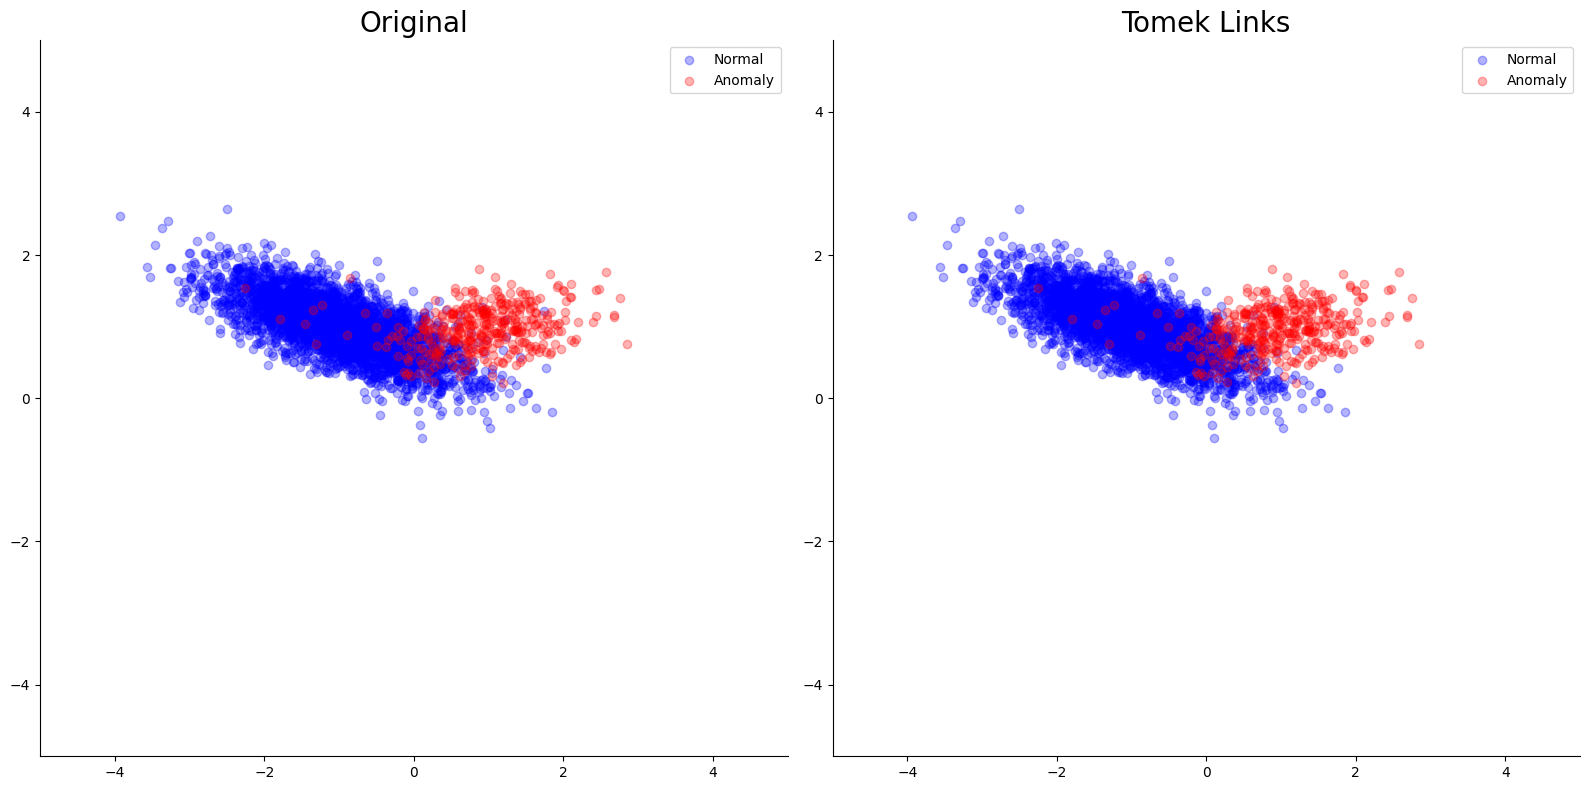

In [25]:
""" Tomek Links 적용 """

### Tomek Links 수행
tl = TomekLinks(sampling_strategy='auto') ### 다수 Class만 일부 제거
X_resampled, y_resampled = tl.fit_resample(X_train, y_train)

### 데이터 분포 시각화
plot_binary_representation(X_train, 
                        y_train, 
                        X_resampled, 
                        y_resampled, 
                        title1='Original',
                        title2='Tomek Links')

In [26]:
""" Tomek Links 결과 확인 """
print('======== Before ========')
print(y_train.value_counts().sort_index())
print()
print('======== After ========')
print(y_resampled.value_counts().sort_index())

======== Before ========
y
0    3368
1     382
Name: count, dtype: int64

======== After ========
y
0    3309
1     382
Name: count, dtype: int64


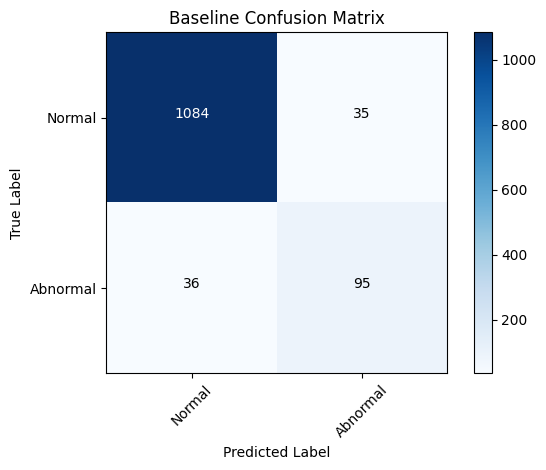

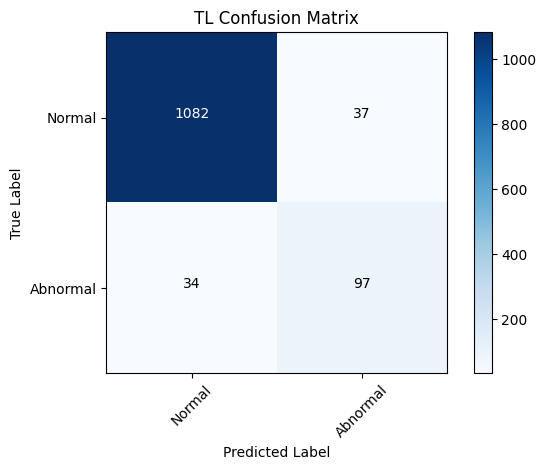

Baseline Accuracy : 0.9432
Baseline Precision : 0.8493
Baseline Recall : 0.847
Baseline F1-score : 0.8481
--------------------------
Accuracy : 0.9432
Precision : 0.8467
Recall : 0.8537
F1-score : 0.8502


In [27]:
""" Tomek Links 적용 후, 모델 성능 파악 """

### 모델 Train & Test
tl_tree = tree.DecisionTreeClassifier(random_state=2024)
tl_tree = tl_tree.fit(X_resampled, y_resampled)
y_pred_test = tl_tree.predict(X_test)

### Confusion Matrix 시각화 및 성능 산출
classes = ['Normal', 'Abnormal']
cm_tl = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm_baseline, classes)
plot_confusion_matrix(cm_tl, classes, 'TL')
print(f'Baseline Accuracy : {round(acc_baseline,4)}')
print(f'Baseline Precision : {round(precision_baseline,4)}')
print(f'Baseline Recall : {round(recall_baseline,4)}')
print(f'Baseline F1-score : {round(f1_baseline,4)}')
print('--------------------------')
_, _, _, f1_tl = calculate_classification_metrics(y_test, y_pred_test)

#### **1-5. Condensed Nearest Neighbor Rule (CNN Rule) 적용**

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.CondensedNearestNeighbour.html#imblearn.under_sampling.CondensedNearestNeighbour

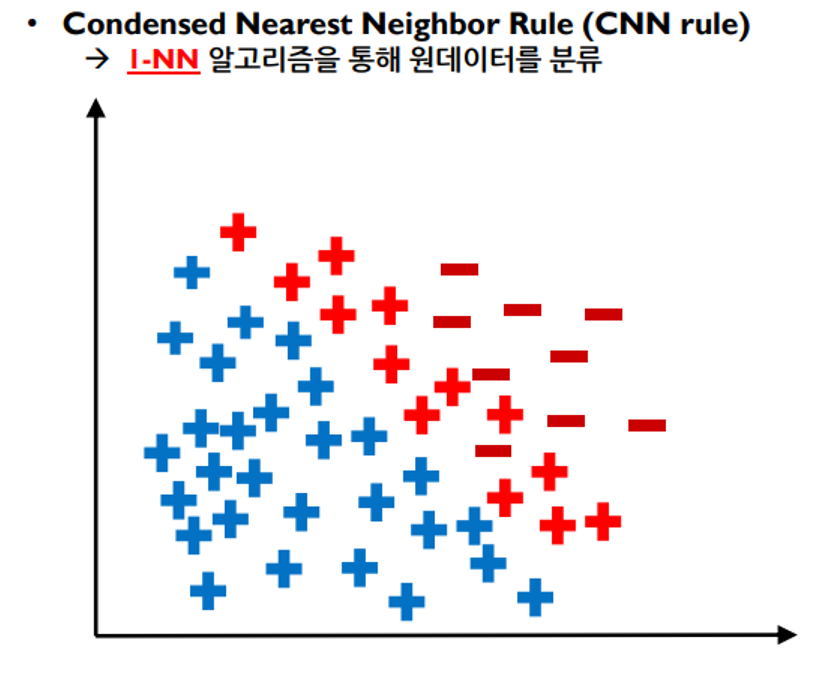

In [28]:
""" 설명 장표 불러오기 """
Image('image/4-UnderSampling4.PNG')

In [29]:
from imblearn.under_sampling import CondensedNearestNeighbour

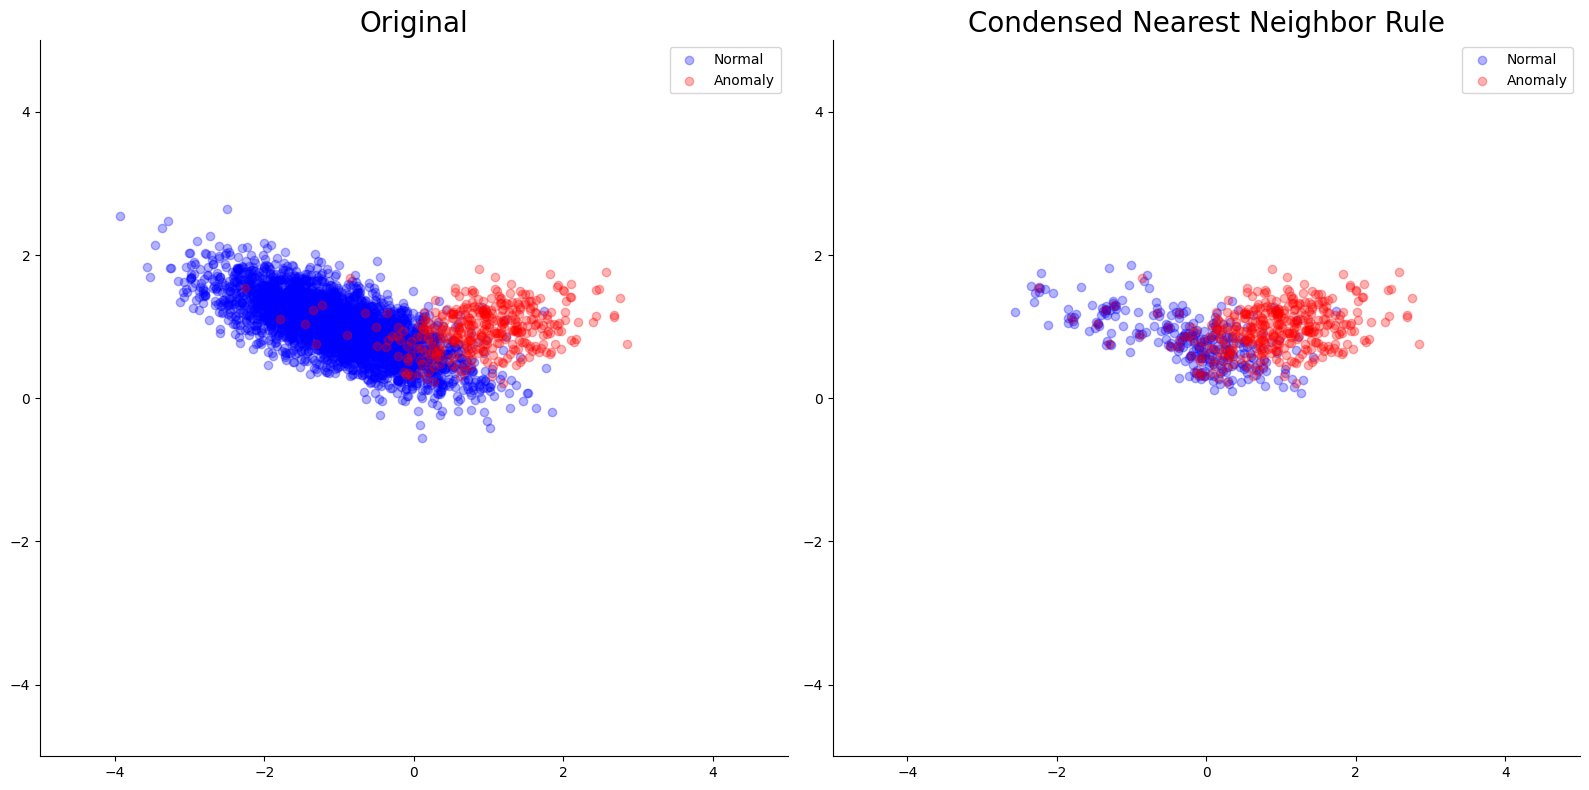

In [30]:
""" CNN Rule 적용 """

### CNN Rule 수행
cnn = CondensedNearestNeighbour(sampling_strategy='auto',
                                random_state=2024)
X_resampled, y_resampled = cnn.fit_resample(X_train, y_train)

### 데이터 분포 시각화
plot_binary_representation(X_train, 
                        y_train, 
                        X_resampled, 
                        y_resampled, 
                        title1='Original',
                        title2='Condensed Nearest Neighbor Rule')

In [31]:
""" CNN Rule 결과 확인 """
print('======== Before ========')
print(y_train.value_counts().sort_index())
print()
print('======== After ========')
print(y_resampled.value_counts().sort_index())

======== Before ========
y
0    3368
1     382
Name: count, dtype: int64

======== After ========
y
0    298
1    382
Name: count, dtype: int64


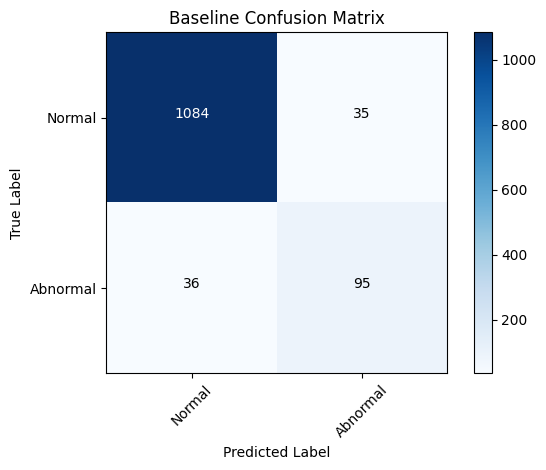

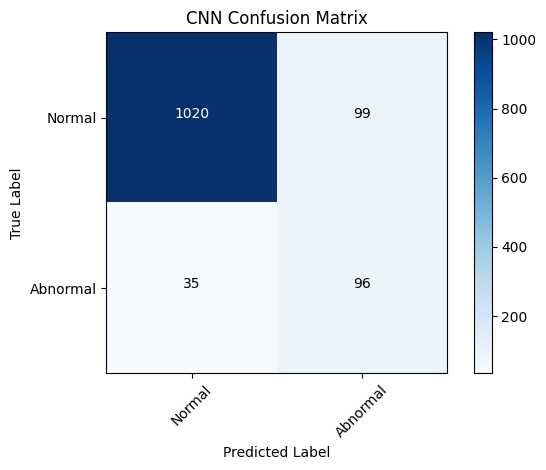

Baseline Accuracy : 0.9432
Baseline Precision : 0.8493
Baseline Recall : 0.847
Baseline F1-score : 0.8481
--------------------------
Accuracy : 0.8928
Precision : 0.7296
Recall : 0.8222
F1-score : 0.7637


In [32]:
""" CNN Rule 적용 후, 모델 성능 파악 """

### 모델 Train & Test
cnn_tree = tree.DecisionTreeClassifier(random_state=2024)
cnn_tree = cnn_tree.fit(X_resampled, y_resampled)
y_pred_test = cnn_tree.predict(X_test)

### Confusion Matrix 시각화 및 성능 산출
classes = ['Normal', 'Abnormal']
cm_cnn = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm_baseline, classes)
plot_confusion_matrix(cm_cnn, classes, 'CNN')
print(f'Baseline Accuracy : {round(acc_baseline,4)}')
print(f'Baseline Precision : {round(precision_baseline,4)}')
print(f'Baseline Recall : {round(recall_baseline,4)}')
print(f'Baseline F1-score : {round(f1_baseline,4)}')
print('--------------------------')
_, _, _, f1_cnn = calculate_classification_metrics(y_test, y_pred_test)

#### **1-6. One-Sided Selection (OSS) 적용**

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.OneSidedSelection.html#imblearn.under_sampling.OneSidedSelection

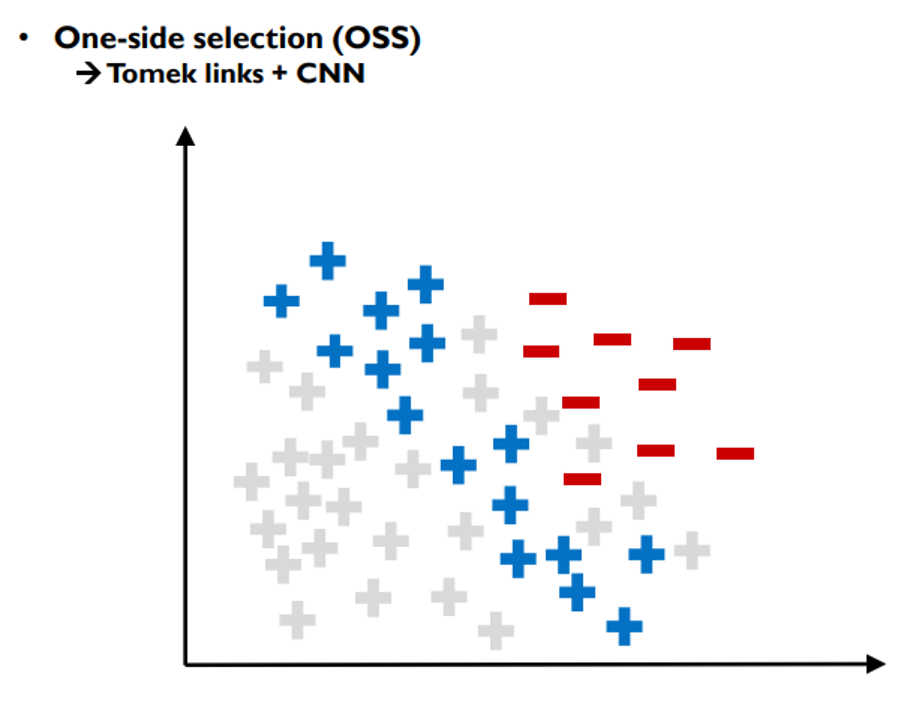

In [33]:
""" 설명 장표 불러오기 """
Image('image/4-UnderSampling5.PNG')

In [34]:
from imblearn.under_sampling import OneSidedSelection

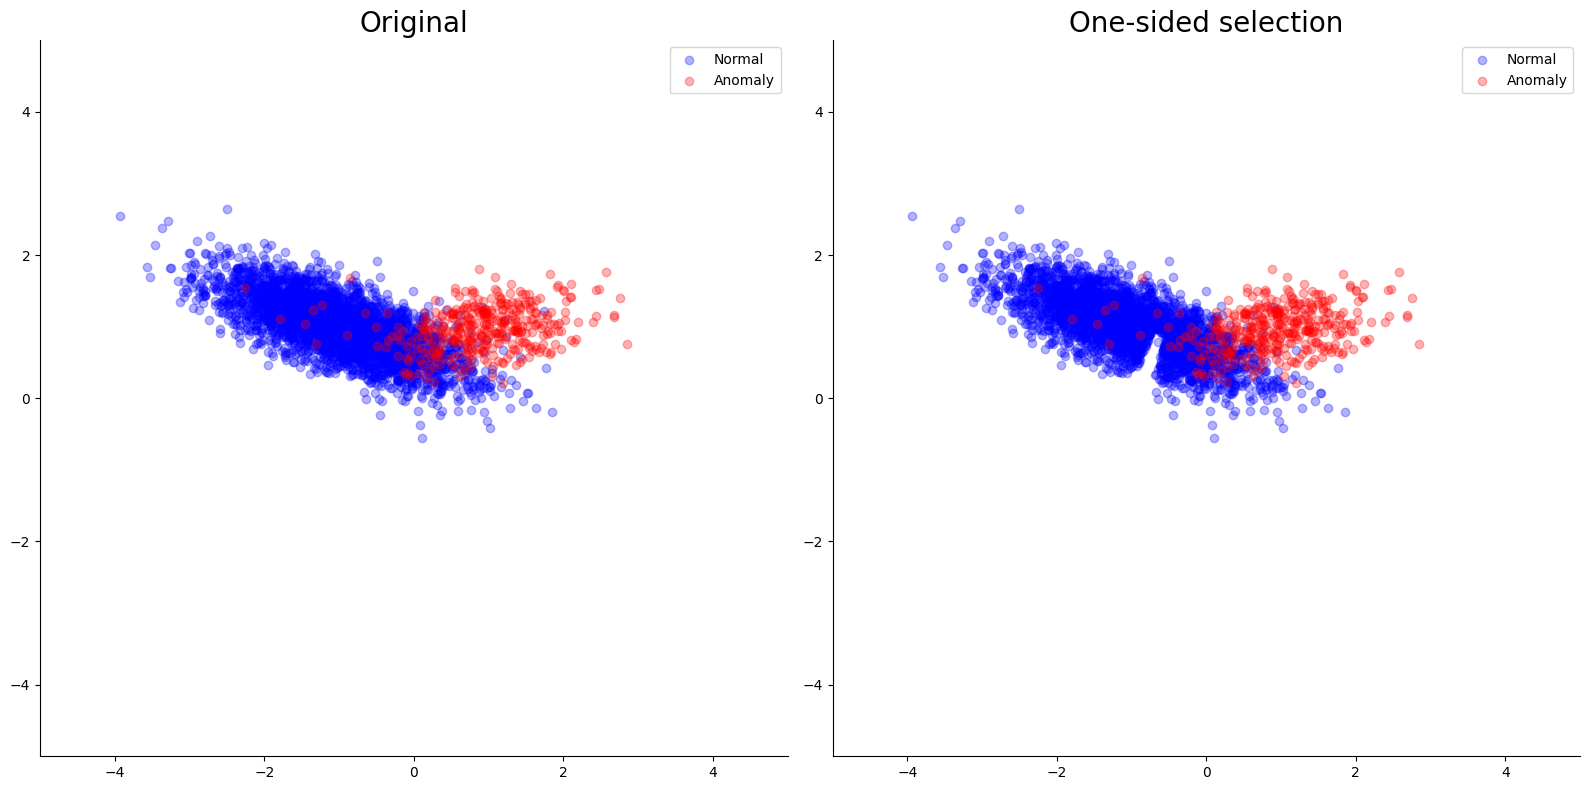

In [35]:
""" OSS 적용 """

### OSS 수행
oss = OneSidedSelection(random_state=2024)
X_resampled, y_resampled = oss.fit_resample(X_train, y_train)

### 데이터 분포 시각화
plot_binary_representation(X_train, 
                        y_train, 
                        X_resampled, 
                        y_resampled, 
                        title1='Original',
                        title2='One-sided selection')

In [36]:
""" OSS 결과 확인 """
print('======== Before ========')
print(y_train.value_counts().sort_index())
print()
print('======== After ========')
print(y_resampled.value_counts().sort_index())

======== Before ========
y
0    3368
1     382
Name: count, dtype: int64

======== After ========
y
0    3115
1     382
Name: count, dtype: int64


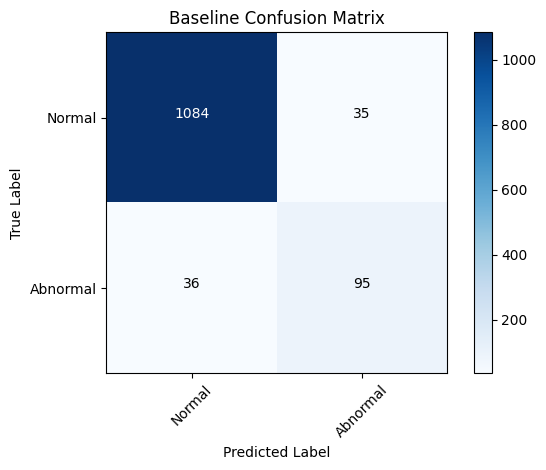

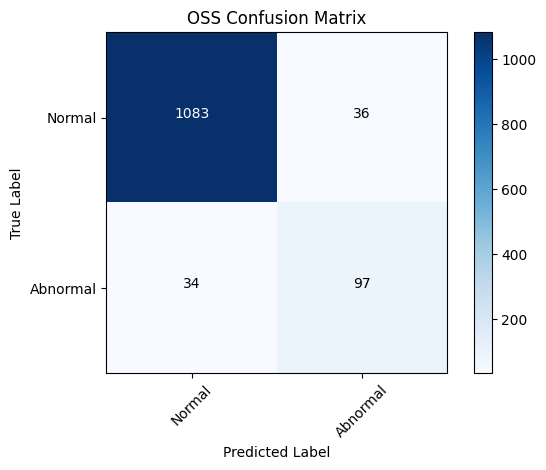

Baseline Accuracy : 0.9432
Baseline Precision : 0.8493
Baseline Recall : 0.847
Baseline F1-score : 0.8481
--------------------------
Accuracy : 0.9440
Precision : 0.8494
Recall : 0.8541
F1-score : 0.8518


In [37]:
""" OSS 적용 후, 모델 성능 파악 """

### 모델 Train & Test
oss_tree = tree.DecisionTreeClassifier(random_state=2024)
oss_tree = oss_tree.fit(X_resampled, y_resampled)
y_pred_test = oss_tree.predict(X_test)

### Confusion Matrix 시각화 및 성능 산출
classes = ['Normal', 'Abnormal']
cm_oss = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm_baseline, classes)
plot_confusion_matrix(cm_oss, classes, 'OSS')
print(f'Baseline Accuracy : {round(acc_baseline,4)}')
print(f'Baseline Precision : {round(precision_baseline,4)}')
print(f'Baseline Recall : {round(recall_baseline,4)}')
print(f'Baseline F1-score : {round(f1_baseline,4)}')
print('--------------------------')
_, _, _, f1_oss = calculate_classification_metrics(y_test, y_pred_test)

#### **1-7. 알고리즘 별 성능 비교**

(0.7, 0.9)

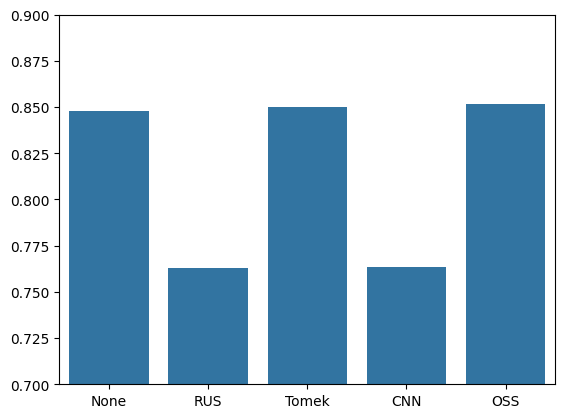

In [38]:
""" 알고리즘 별 성능 비교 """
sns.barplot(x=['None', 'RUS', 'Tomek', 'CNN', 'OSS'],
            y=[f1_baseline, f1_rus, f1_tl, f1_cnn, f1_oss])
plt.ylim([.7,.9])

## **2. Multi-Class Classification**

#### **2-1. 실습 데이터 생성**
 - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [40]:
""" 데이터 생성 """
X_syn, y_syn = create_dataset(n_samples=5000,
                               n_classes=3, 
                               weights=(0.8, 0.1, 0.1), 
                               n_cluster=1, 
                               class_sep=1, 
                               random_state=2024)

print(X_syn.shape, y_syn.shape)

(5000, 2) (5000, 1)


In [41]:
""" 데이터 형태 확인 """
pd.concat((X_syn, y_syn),axis=1)

,X1,X2,y
0,0.030357,0.511476,0
1,-0.239385,0.305462,0
2,-2.745159,1.098856,0
3,-1.649415,1.331407,0
4,-1.446323,0.885917,0
...,...,...,...
4995,-0.994516,0.521047,0
4996,-0.842933,0.665496,0
4997,1.573412,1.324693,1
4998,-0.225404,0.906365,0


In [42]:
""" 데이터 불균형 확인 """
print(y_syn.value_counts())

y
0    3989
1     507
2     504
Name: count, dtype: int64


In [43]:
""" Train/Test 분할 """
X_train, X_test, y_train, y_test = train_test_split(X_syn, y_syn, random_state=2024)

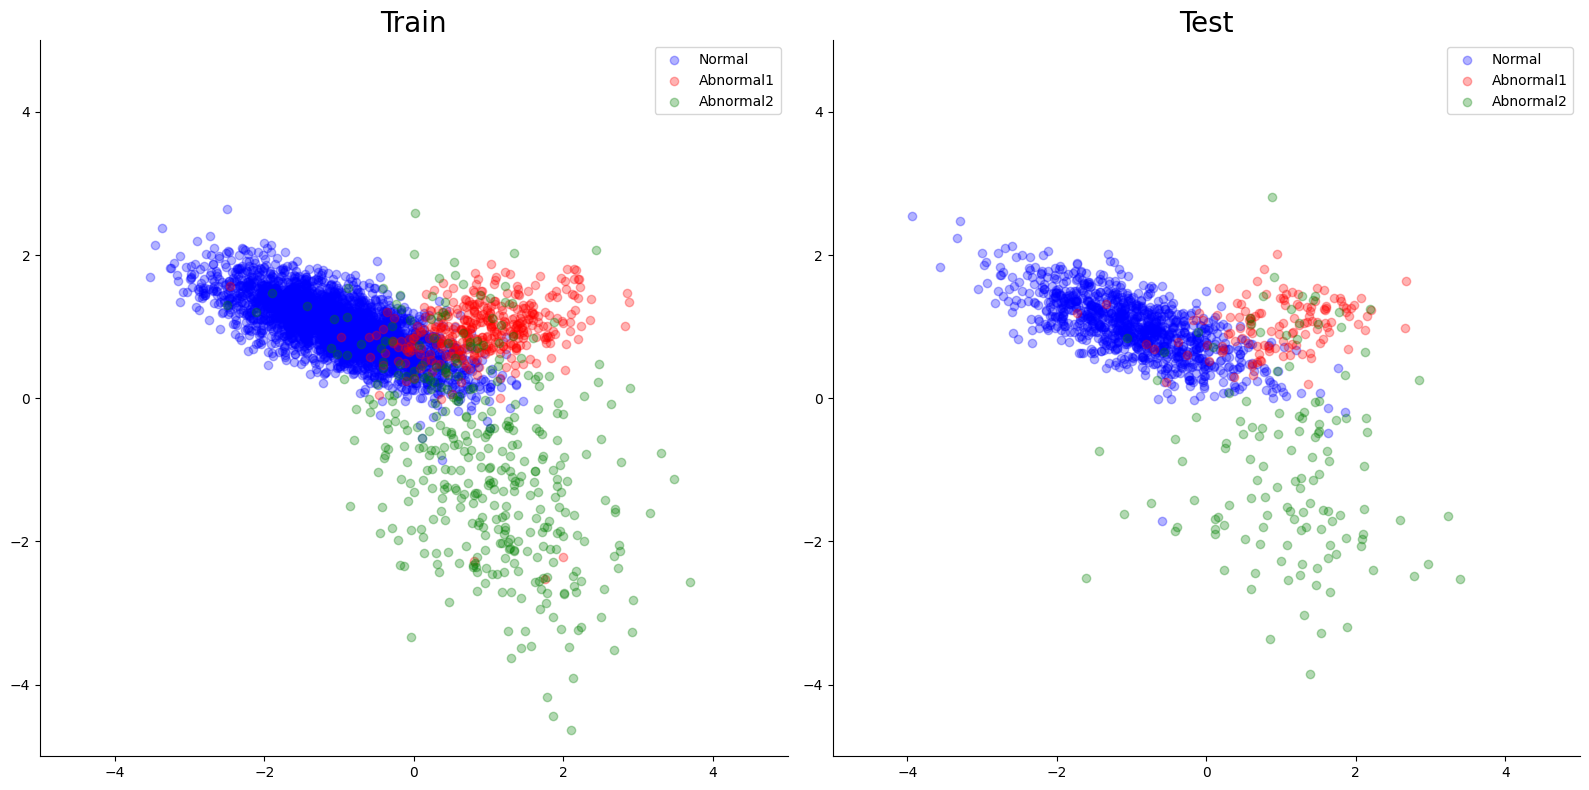

In [44]:
""" 데이터 분포 시각화 """
plot_multiclass_representation(X_train, 
                        y_train, 
                        X_test, 
                        y_test, 
                        title1='Train', 
                        title2='Test')

#### **2-2. 데이터가 불균형한 상태에서 모델링 (Baseline)**

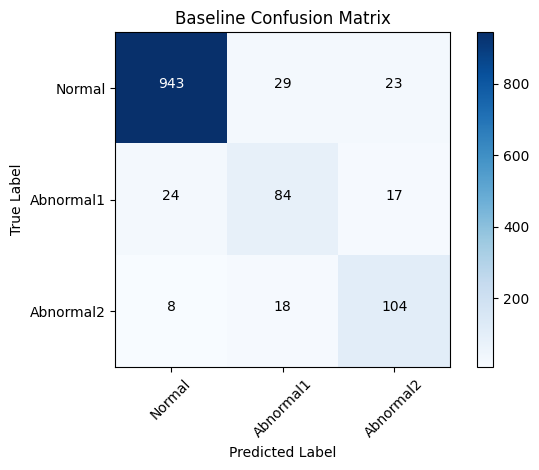

Accuracy : 0.9048
Precision : 0.7769
Recall : 0.8066
F1-score : 0.7909


In [59]:
""" 데이터 불균형한 상태에서 모델링 후, 모델 성능 파악 """

### 모델 Train & Test
dt_tree = tree.DecisionTreeClassifier(random_state=2024)
dt_tree.fit(X_train, y_train)
y_pred_test = dt_tree.predict(X_test)

### Confusion Matrix 시각화 및 성능 산출
classes = ['Normal', 'Abnormal1', 'Abnormal2']
cm_baseline = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm_baseline, classes)
acc_baseline, precision_baseline, recall_baseline, f1_baseline = calculate_classification_metrics(y_test, y_pred_test)

#### **2-3. Random UnderSampling 적용**

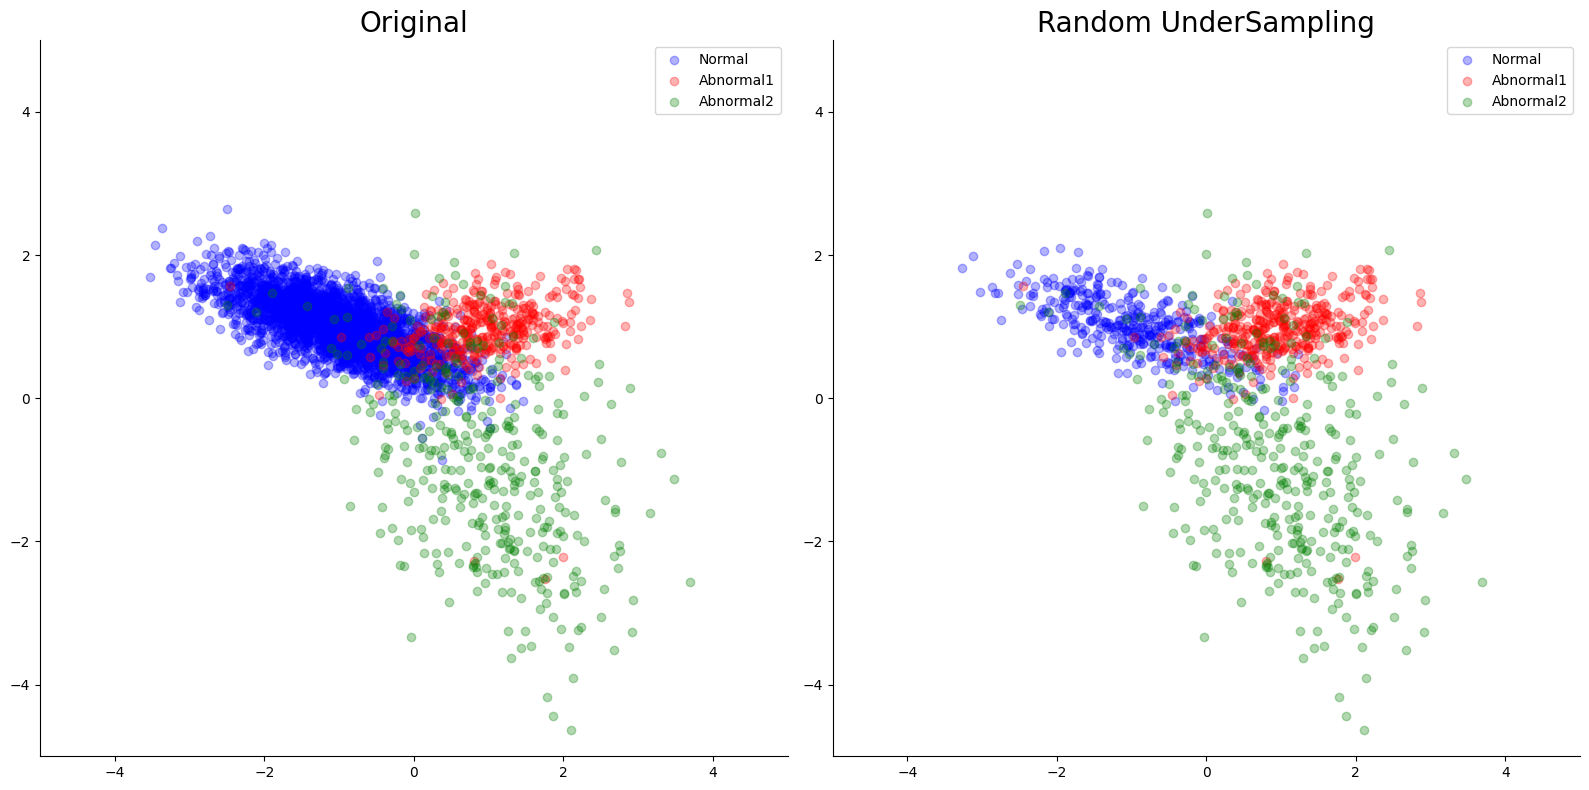

In [60]:
""" Random UnderSampling 적용 """

### Random UnderSampling 수행
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

### 데이터 분포 시각화
plot_multiclass_representation(X_train, 
                            y_train, 
                            X_resampled, 
                            y_resampled, 
                            title1='Original', 
                            title2='Random UnderSampling')

In [61]:
""" Random UnderSampling 결과 확인 """
print('======== Before ========')
print(y_train.value_counts().sort_index())
print()
print('======== After ========')
print(y_resampled.value_counts().sort_index())

======== Before ========
y
0    2994
1     382
2     374
Name: count, dtype: int64

======== After ========
y
0    374
1    374
2    374
Name: count, dtype: int64


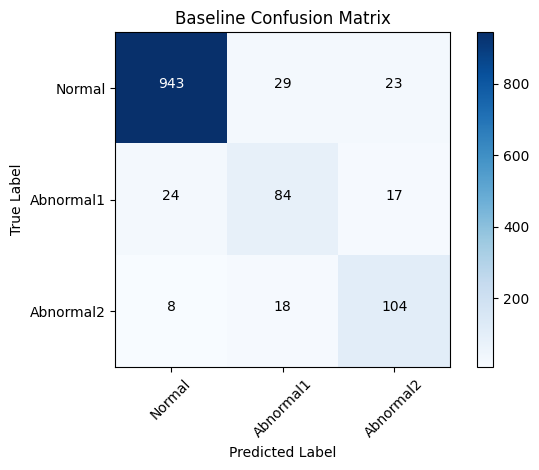

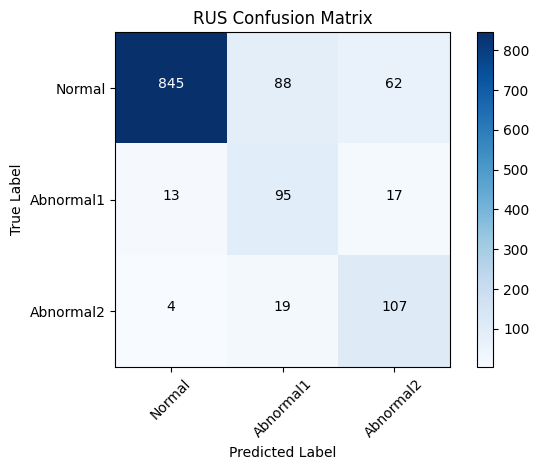

Baseline Accuracy : 0.9048
Baseline Precision : 0.7769
Baseline Recall : 0.8066
Baseline F1-score : 0.7909
--------------------------
Accuracy : 0.8376
Precision : 0.6753
Recall : 0.8108
F1-score : 0.7228


In [62]:
""" Random UnderSampling 적용 후, 모델 성능 파악 """

### 모델 Train & Test
rus_tree = tree.DecisionTreeClassifier(random_state=2024)
rus_tree = rus_tree.fit(X_resampled, y_resampled)
y_pred_test = rus_tree.predict(X_test)

### Confusion Matrix 시각화 및 성능 산출
classes = ['Normal', 'Abnormal1', 'Abnormal2']
cm_rus = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm_baseline, classes)
plot_confusion_matrix(cm_rus, classes, 'RUS')
print(f'Baseline Accuracy : {round(acc_baseline,4)}')
print(f'Baseline Precision : {round(precision_baseline,4)}')
print(f'Baseline Recall : {round(recall_baseline,4)}')
print(f'Baseline F1-score : {round(f1_baseline,4)}')
print('--------------------------')
_, _, _, f1_rus = calculate_classification_metrics(y_test, y_pred_test)

#### **2-4. Tomek Links 적용**

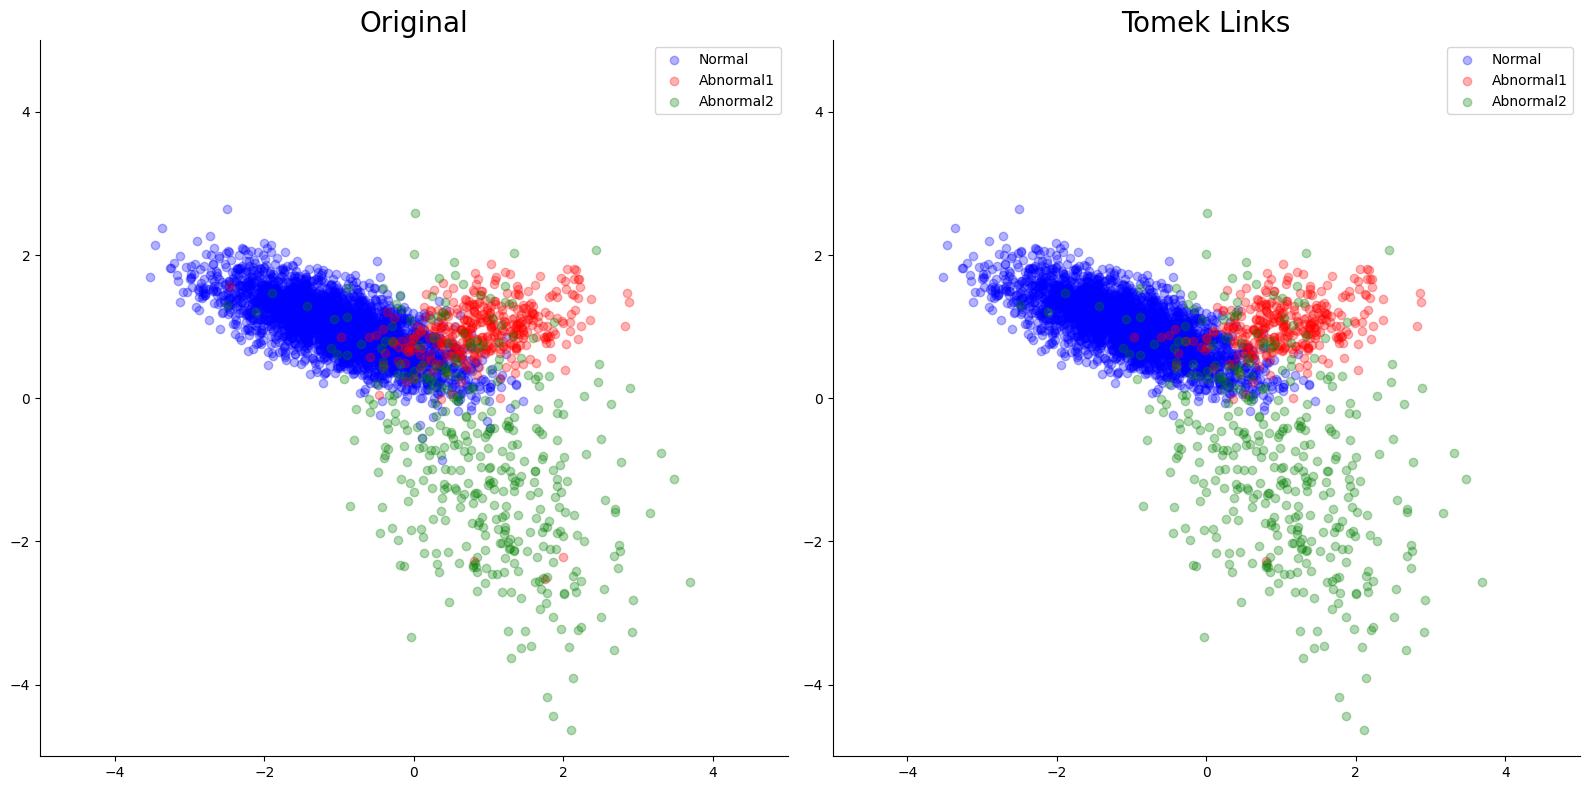

In [63]:
""" Tomek Links 적용 """

### Tomek Links 수행
tl = TomekLinks() ### 다수 Class만 일부 제거
X_resampled, y_resampled = tl.fit_resample(X_train, y_train)

### 데이터 분포 시각화
plot_multiclass_representation(X_train, 
                            y_train, 
                            X_resampled, 
                            y_resampled, 
                            title1='Original',
                            title2='Tomek Links')

In [64]:
""" Tomek Links 결과 확인 """
print('======== Before ========')
print(y_train.value_counts().sort_index())
print()
print('======== After ========')
print(y_resampled.value_counts().sort_index())

======== Before ========
y
0    2994
1     382
2     374
Name: count, dtype: int64

======== After ========
y
0    2913
1     317
2     374
Name: count, dtype: int64


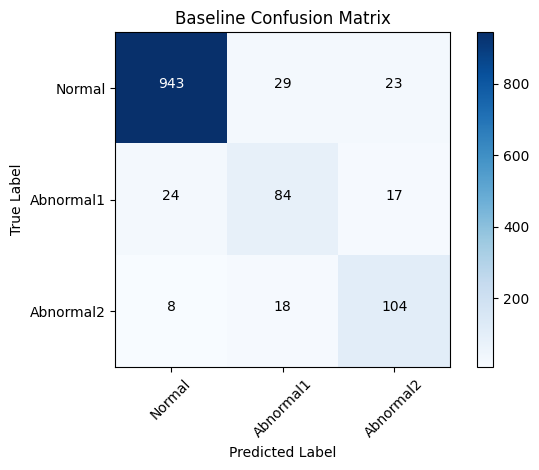

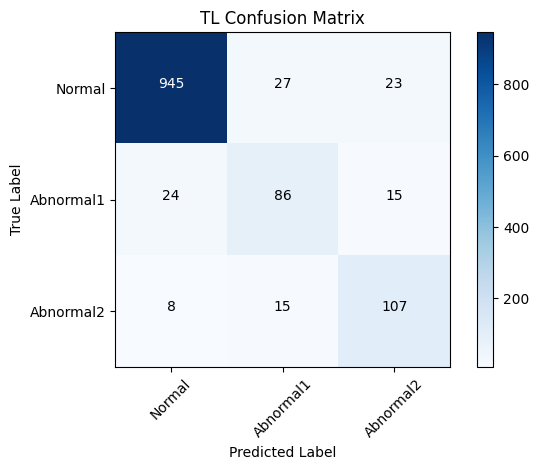

Baseline Accuracy : 0.9048
Baseline Precision : 0.7769
Baseline Recall : 0.8066
Baseline F1-score : 0.7909
--------------------------
Accuracy : 0.9104
Precision : 0.7924
Recall : 0.8203
F1-score : 0.8055


In [65]:
""" Tomek Links 적용 후, 모델 성능 파악 """

### 모델 Train & Test
tl_tree = tree.DecisionTreeClassifier(random_state=2024)
tl_tree = tl_tree.fit(X_resampled, y_resampled)
y_pred_test = tl_tree.predict(X_test)

### Confusion Matrix 시각화 및 성능 산출
classes = ['Normal', 'Abnormal1', 'Abnormal2']
cm_tl = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm_baseline, classes)
plot_confusion_matrix(cm_tl, classes, 'TL')
print(f'Baseline Accuracy : {round(acc_baseline,4)}')
print(f'Baseline Precision : {round(precision_baseline,4)}')
print(f'Baseline Recall : {round(recall_baseline,4)}')
print(f'Baseline F1-score : {round(f1_baseline,4)}')
print('--------------------------')
_, _, _, f1_tl = calculate_classification_metrics(y_test, y_pred_test)

#### **2-5. Condensed Nearest Neighbor Rule (CNN Rule) 적용**

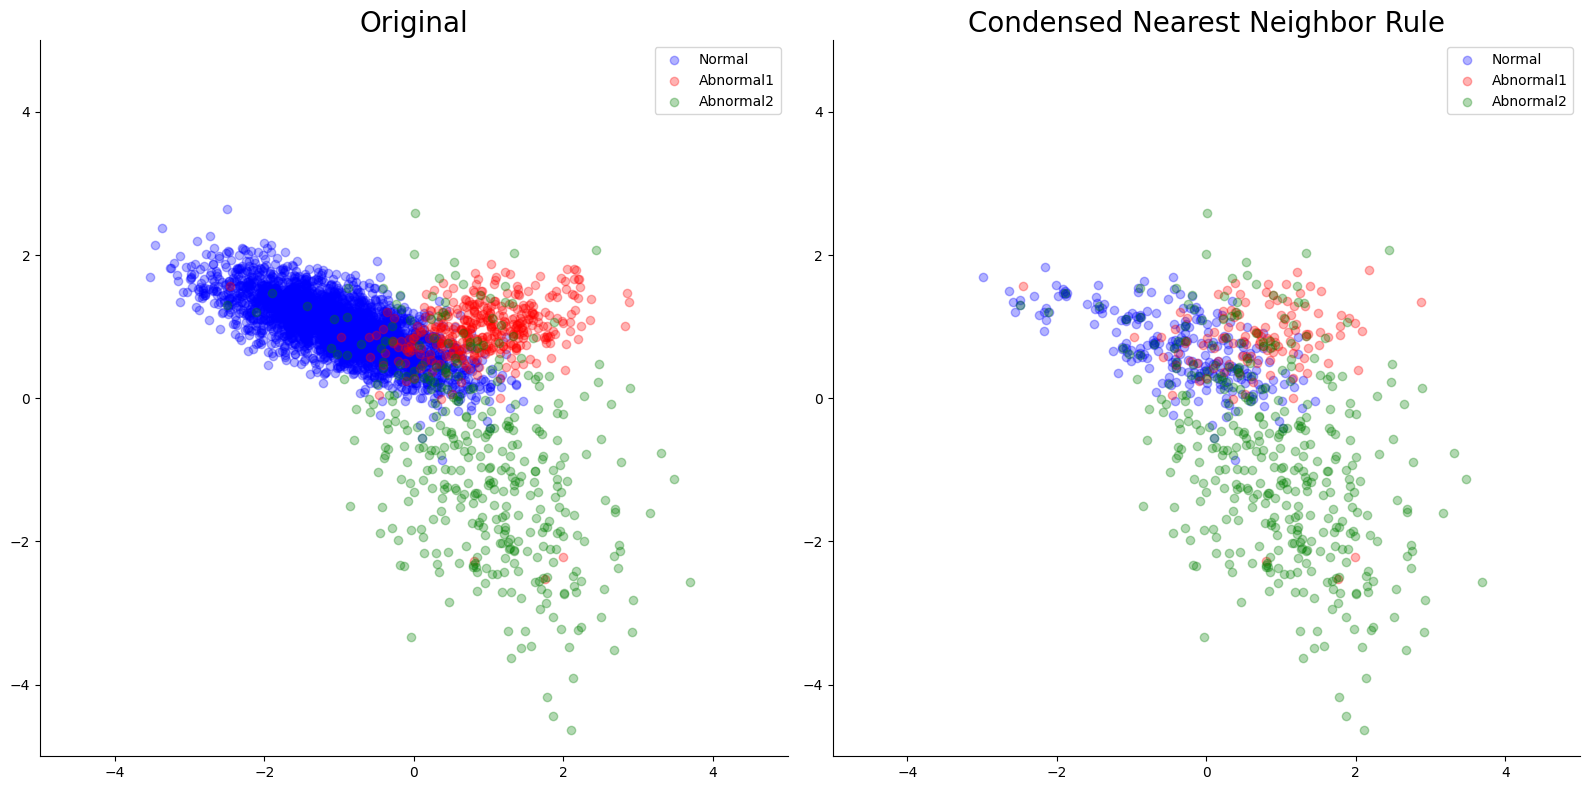

In [66]:
""" CNN Rule 적용 """

### CNN Rule 수행
cnn = CondensedNearestNeighbour(random_state=2024)
X_resampled, y_resampled = cnn.fit_resample(X_train, y_train)

### 데이터 분포 시각화
plot_multiclass_representation(X_train, 
                            y_train, 
                            X_resampled, 
                            y_resampled, 
                            title1='Original',
                            title2='Condensed Nearest Neighbor Rule')

In [67]:
""" CNN Rule 결과 확인 """
print('======== Before ========')
print(y_train.value_counts().sort_index())
print()
print('======== After ========')
print(y_resampled.value_counts().sort_index())

======== Before ========
y
0    2994
1     382
2     374
Name: count, dtype: int64

======== After ========
y
0    246
1    121
2    374
Name: count, dtype: int64


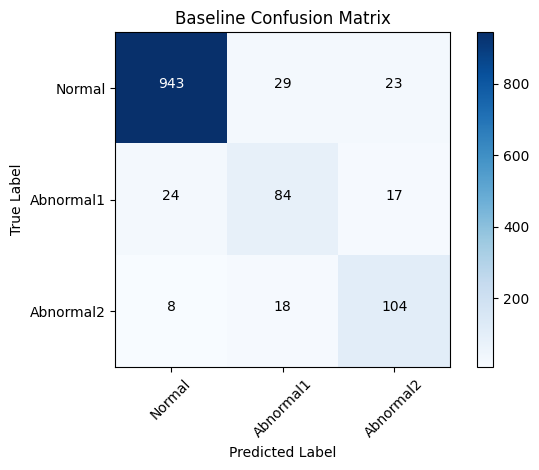

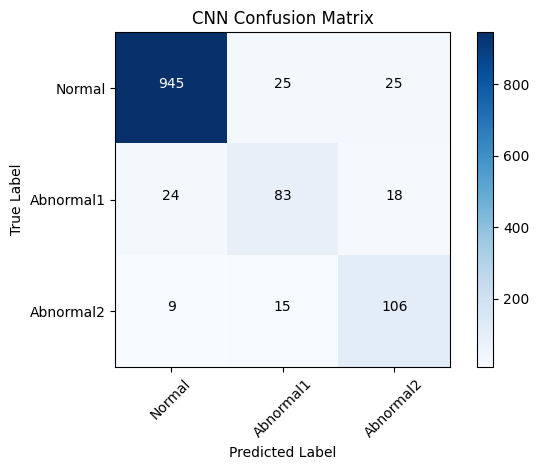

Baseline Accuracy : 0.9048
Baseline Precision : 0.7769
Baseline Recall : 0.8066
Baseline F1-score : 0.7909
--------------------------
Accuracy : 0.9072
Precision : 0.7842
Recall : 0.8097
F1-score : 0.7957


In [74]:
""" CNN Rule 적용 후, 모델 성능 파악 """

### 모델 Train & Test
cnn_tree = tree.DecisionTreeClassifier(random_state=2024)
cnn_tree = cnn_tree.fit(X_resampled, y_resampled)
y_pred_test = cnn_tree.predict(X_test)

### Confusion Matrix 시각화 및 성능 산출
classes = ['Normal', 'Abnormal1', 'Abnormal2']
cm_cnn = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm_baseline, classes)
plot_confusion_matrix(cm_cnn, classes, 'CNN')
print(f'Baseline Accuracy : {round(acc_baseline,4)}')
print(f'Baseline Precision : {round(precision_baseline,4)}')
print(f'Baseline Recall : {round(recall_baseline,4)}')
print(f'Baseline F1-score : {round(f1_baseline,4)}')
print('--------------------------')
_, _, _, f1_cnn = calculate_classification_metrics(y_test, y_pred_test)

#### **2-6. One-Sided Selection (OSS) 적용**

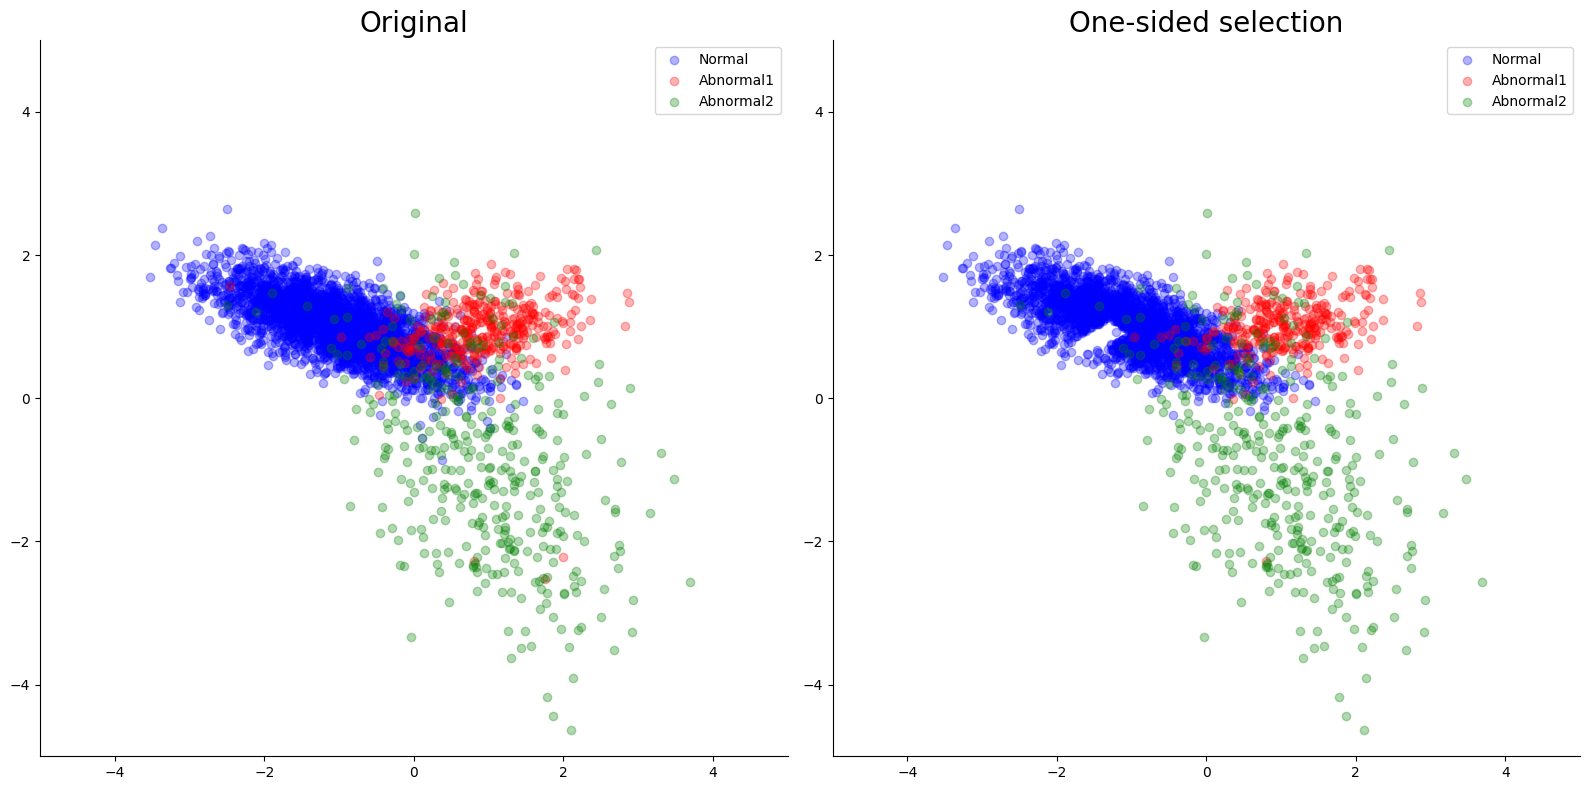

In [69]:
""" OSS 적용 """

### OSS 수행
oss = OneSidedSelection(random_state=2024)
X_resampled, y_resampled = oss.fit_resample(X_train, y_train)

### 데이터 분포 시각화
plot_multiclass_representation(X_train, 
                            y_train, 
                            X_resampled, 
                            y_resampled, 
                            title1='Original',
                            title2='One-sided selection')

In [70]:
""" OSS 결과 확인 """
print('======== Before ========')
print(y_train.value_counts().sort_index())
print()
print('======== After ========')
print(y_resampled.value_counts().sort_index())

======== Before ========
y
0    2994
1     382
2     374
Name: count, dtype: int64

======== After ========
y
0    2690
1     310
2     374
Name: count, dtype: int64


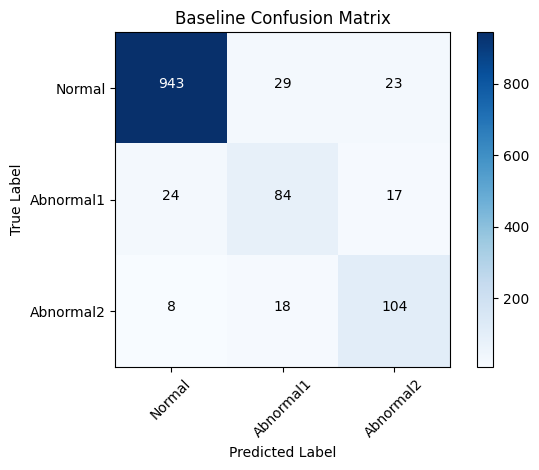

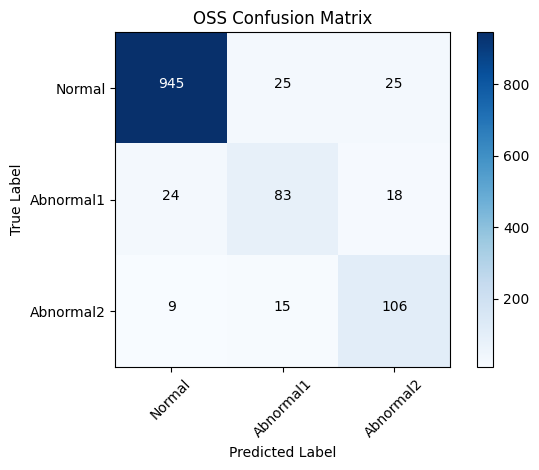

Baseline Accuracy : 0.9048
Baseline Precision : 0.7769
Baseline Recall : 0.8066
Baseline F1-score : 0.7909
--------------------------
Accuracy : 0.9072
Precision : 0.7842
Recall : 0.8097
F1-score : 0.7957


In [73]:
""" OSS 적용 후, 모델 성능 파악 """

### 모델 Train & Test
oss_tree = tree.DecisionTreeClassifier(random_state=2024)
oss_tree = oss_tree.fit(X_resampled, y_resampled)
y_pred_test = oss_tree.predict(X_test)

### Confusion Matrix 시각화 및 성능 산출
classes = ['Normal', 'Abnormal1', 'Abnormal2']
cm_oss = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm_baseline, classes)
plot_confusion_matrix(cm_oss, classes, 'OSS')
print(f'Baseline Accuracy : {round(acc_baseline,4)}')
print(f'Baseline Precision : {round(precision_baseline,4)}')
print(f'Baseline Recall : {round(recall_baseline,4)}')
print(f'Baseline F1-score : {round(f1_baseline,4)}')
print('--------------------------')
_, _, _, f1_oss = calculate_classification_metrics(y_test, y_pred_test)

#### **2-7. 알고리즘 별 성능 비교**

<Axes: >

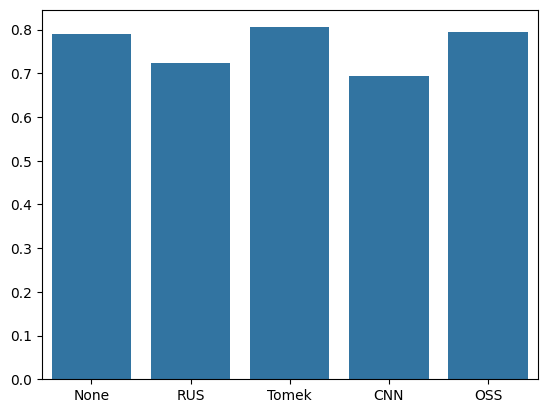

In [72]:
""" 알고리즘 별 성능 비교 """
sns.barplot(x=['None', 'RUS', 'Tomek', 'CNN', 'OSS'],
            y=[f1_baseline, f1_rus, f1_tl, f1_cnn, f1_oss])